In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten

In [2]:
X_train = np.load('X_train.npy')
y_train = pd.read_csv(r'y_train.csv', index_col= 0)
input_shape = X_train.shape[1:]
output_shape = y_train.shape[-1]

In [3]:
y_train.head()

,AFIB,OTHER,SR
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [4]:
model = Sequential()
model.add(Conv1D(filters= 32, kernel_size = 3, activation = 'relu', input_shape = input_shape))
model.add(MaxPooling1D(3, 3))

model.add(Conv1D(filters= 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling1D(3, 3))

model.add(Conv1D(filters= 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling1D(3, 3))

model.add(Conv1D(filters= 128, kernel_size = 3, activation = 'relu'))
model.add(Flatten())


model.add(Dense(3, activation= 'softmax'))


In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 32)           1184      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 332, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 330, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 110, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 108, 64)           12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 36, 64)           0

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
model_x= X_scaler.fit(X_train.reshape(-1, X_train.shape[-1]))
scaled_X = model_x.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

y_scaler = StandardScaler()
model_y= y_scaler.fit(y_train)
scaled_y = model_y.transform(y_train)


In [7]:
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['binary_accuracy', 'Precision', 'Recall'])

In [8]:
model.fit(X_train, y_train, epochs= 15)

Epoch 1/15
518/518 [==============================] - 8s 14ms/step - loss: 0.4874 - binary_accuracy: 0.8921 - precision: 0.8561 - recall: 0.8131
Epoch 2/15
518/518 [==============================] - 6s 12ms/step - loss: 0.3300 - binary_accuracy: 0.9265 - precision: 0.8998 - recall: 0.8771
Epoch 3/15
518/518 [==============================] - 7s 14ms/step - loss: 0.2934 - binary_accuracy: 0.9368 - precision: 0.9109 - recall: 0.8983
Epoch 4/15
518/518 [==============================] - 10s 19ms/step - loss: 0.2725 - binary_accuracy: 0.9412 - precision: 0.9167 - recall: 0.9059
Epoch 5/15
518/518 [==============================] - 8s 16ms/step - loss: 0.2543 - binary_accuracy: 0.9452 - precision: 0.9215 - recall: 0.9134
Epoch 6/15
518/518 [==============================] - 8s 16ms/step - loss: 0.2408 - binary_accuracy: 0.9477 - precision: 0.9242 - recall: 0.9184
Epoch 7/15
518/518 [==============================] - 9s 18ms/step - loss: 0.2237 - binary_accuracy: 0.9498 - precision: 0.9276 -

In [9]:
model.save('ECG_detect_model')

INFO:tensorflow:Assets written to: ECG_detect_model\assets


INFO:tensorflow:Assets written to: ECG_detect_model\assets


In [10]:
X_test = np.load('X_test.npy')
y_test = pd.read_csv(r'y_test.csv', index_col= 0)
y_test_arr = y_test.to_numpy()

In [11]:
X_scaler = StandardScaler()
model_x= X_scaler.fit(X_train.reshape(-1, X_train.shape[-1]))
scaled_X = model_x.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

In [12]:
Test = X_test

In [13]:
prediction = model.predict(Test)

130/130 [==============================] - 2s 11ms/step


In [14]:
y_pred= prediction.argmax(axis= 1)

In [15]:
y_tru= y_test_arr.argmax(axis= 1)

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}



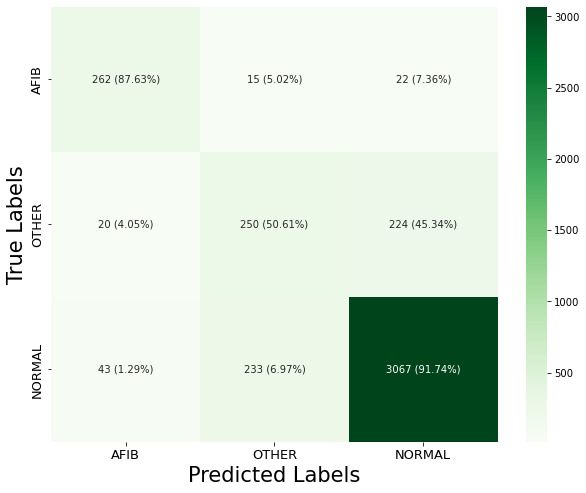

In [66]:
cm= confusion_matrix(y_true= y_tru, y_pred= y_pred)
percentage = ["{0:.2%}".format(x) for x in (cm/np.sum(cm, axis= 1).reshape(3,1)).flatten()]
count = cm.flatten()
labels = [f"{c} ({p})" for c, p in zip(count, percentage)]
labels = np.asarray(labels).reshape(3, 3)
fix, ax = plt.subplots(figsize= (10, 8))
sns.heatmap(cm, annot= labels, fmt = "", ax= ax, cmap= 'Greens')
ax.set_xlabel('Predicted Labels', fontdict=axis_label)
ax.set_ylabel('True Labels', fontdict=axis_label)

ax.xaxis.set_ticklabels(['AFIB', 'OTHER', 'NORMAL'])
ax.yaxis.set_ticklabels(['AFIB', 'OTHER', 'NORMAL'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

#disp= ConfusionMatrixDisplay (cm)
#disp.plot()